In [24]:
# import libraries
import os # provides functions for interacting with the operating system
import seaborn as sns # data viz library built on top of matplotlib that makes visulasizing 
                      #with pandas data structures easier

cwd = os.getcwd()

# let's look at growth ETFs
file_path = cwd+'/archive/Data/ETFs'

print(file_path)


/Users/gracelegrand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/Users/gracelegrand/Notebooks/Practice/Kaggle/S&P Data/archive/Data/ETFs


In [2]:
# Load one of the ETFs
# We will look at the growth ETF, IWF, which is iShares Russell 1000 growth ETF
import pandas as pd
import numpy as np

df = pd.read_csv(file_path+'/iwf.us.txt', delimiter=',', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,43.536,43.874,43.443,43.799,2513391,0
1,2005-02-28,43.837,43.837,43.373,43.628,618327,0
2,2005-03-01,43.582,43.915,43.582,43.915,1187309,0
3,2005-03-02,43.752,44.081,43.600,43.891,456970,0
4,2005-03-03,44.071,44.071,43.600,43.827,531643,0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3196,2017-11-06,130.61,131.05,130.610,130.97,873676,0
3197,2017-11-07,131.03,131.17,130.770,130.95,1277164,0
3198,2017-11-08,130.97,131.48,130.830,131.42,832413,0
3199,2017-11-09,130.64,130.92,129.746,130.74,979369,0
3200,2017-11-10,130.59,130.92,130.400,130.82,1239093,0


In [4]:
df.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [5]:
df.shape

(3201, 7)

There is 3201 trading days in this data set for IWF. Let's do some aggregated averages to see how trading around this ETF may have changed throughout the years

In [6]:
# Import mapping capabilities
import matplotlib as mpl
import matplotlib.pyplot as plt 

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

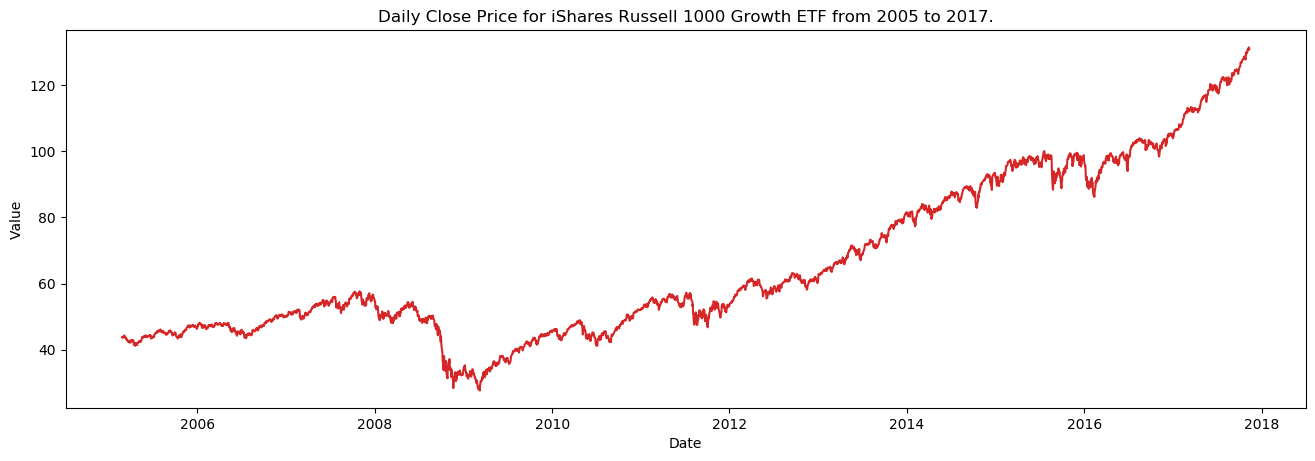

In [7]:
# Plot daily Close Price
plot_df(df, x=df.Date, y=df.Close, 
        title='Daily Close Price for iShares Russell 1000 Growth ETF from 2005 to 2017.')    

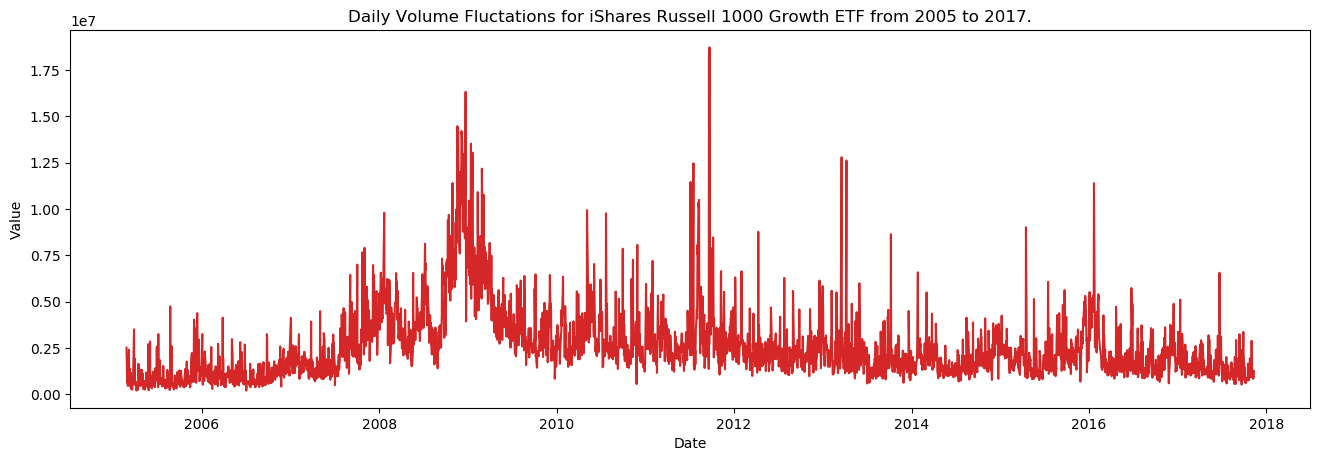

In [8]:
# Plot daily Volumes
plot_df(df, x=df.Date, y=df.Volume, 
        title='Daily Volume Fluctations for iShares Russell 1000 Growth ETF from 2005 to 2017.')    

All these values are positives so we can plot these on both sides of the y axis to show the magnitude. For Closing price, it shows the growth of the fund / company stocks that are pegged to this ETF. 

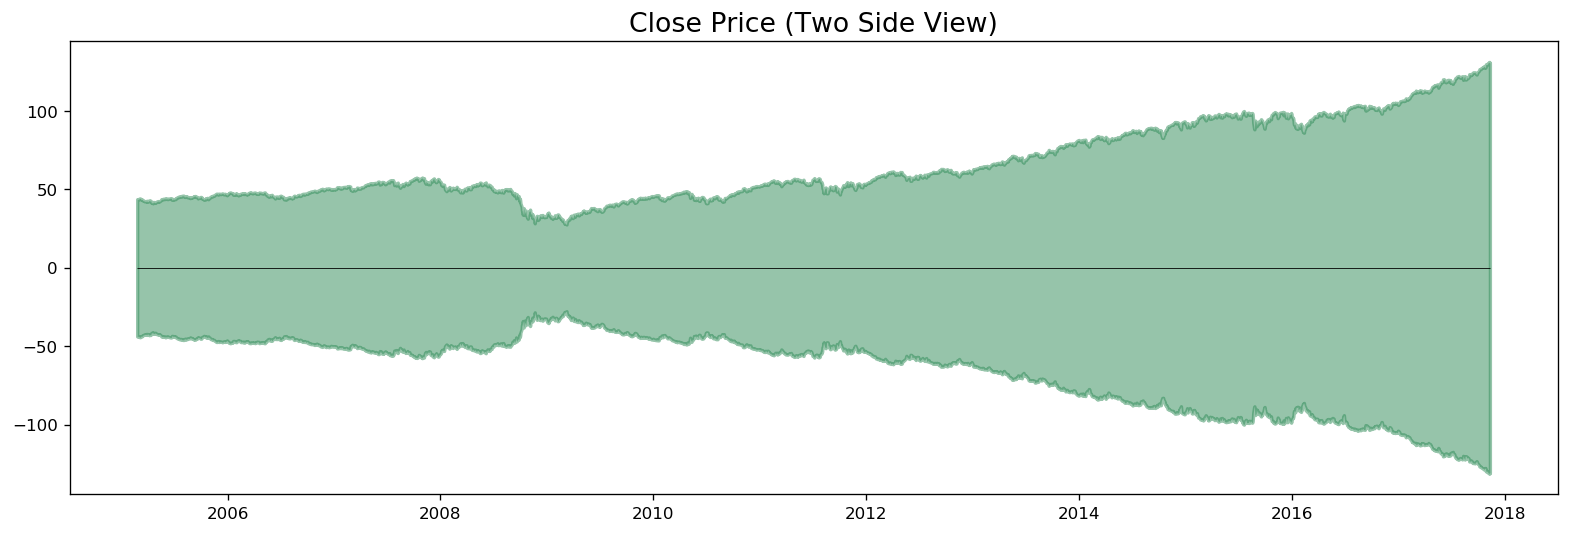

In [9]:
# re-name some of the data so it works for this code
x = df.Date
y1=df.Close

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('Close Price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.show()

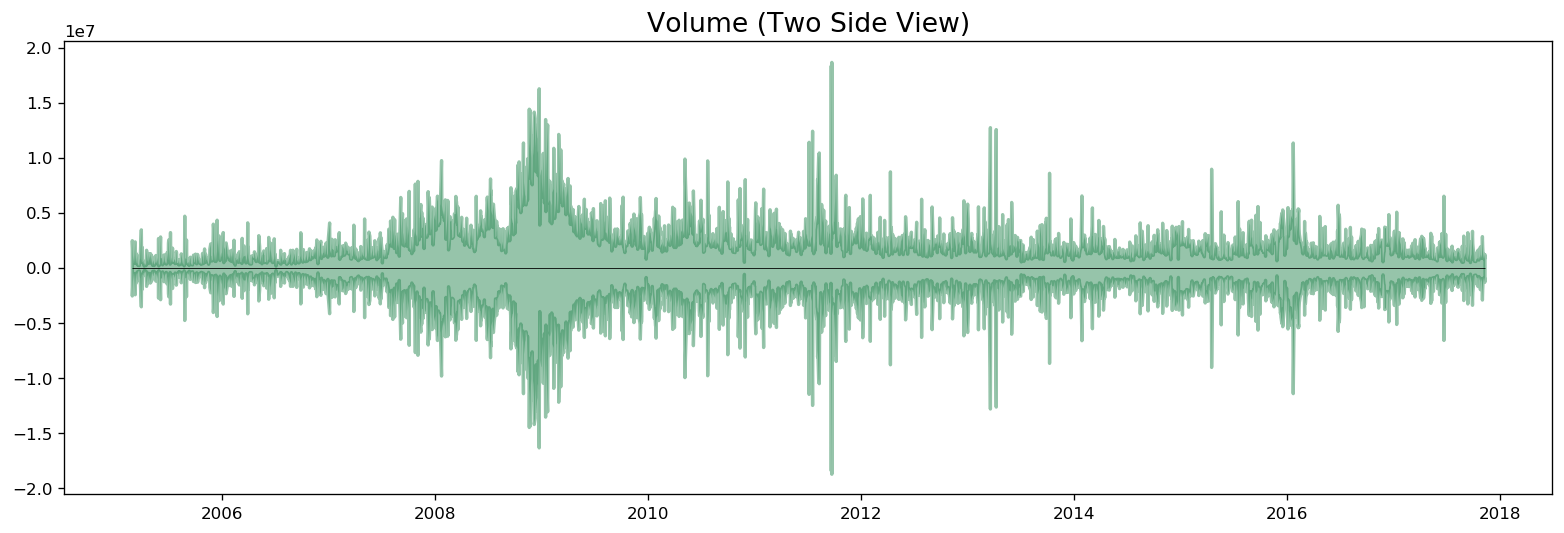

In [10]:
# re-name some of the data so it works for this code
x = df.Date
y1=df.Volume

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
#plt.ylim(-800, 800)
plt.title('Volume (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.Date), xmax=np.max(df.Date), linewidth=.5)
plt.show()

## Aggregations

At this stage, let's look to see if aggregation leads shows any trends that are easily observable.
### Closing Price
Let's first look at and observe closing price for this EDA

In [11]:
# Prepare data
df['Year'] = [i.year for i in df.Date] # returns list of year and places into year column in df
df['Month'] = [i.strftime('%b') for i in df.Date] # returns list of month and places into month column in df

print(df.columns)

# make sure index is a DatetimeIndex, TimedeltaIndex or PeriodIndex
df.set_index('Date', inplace=True)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Year',
       'Month'],
      dtype='object')


In [12]:
month_series = df.resample('BM').mean()['Close'] # BM is for end of Business Month

month_std_series = df.resample('BM').std()['Close']

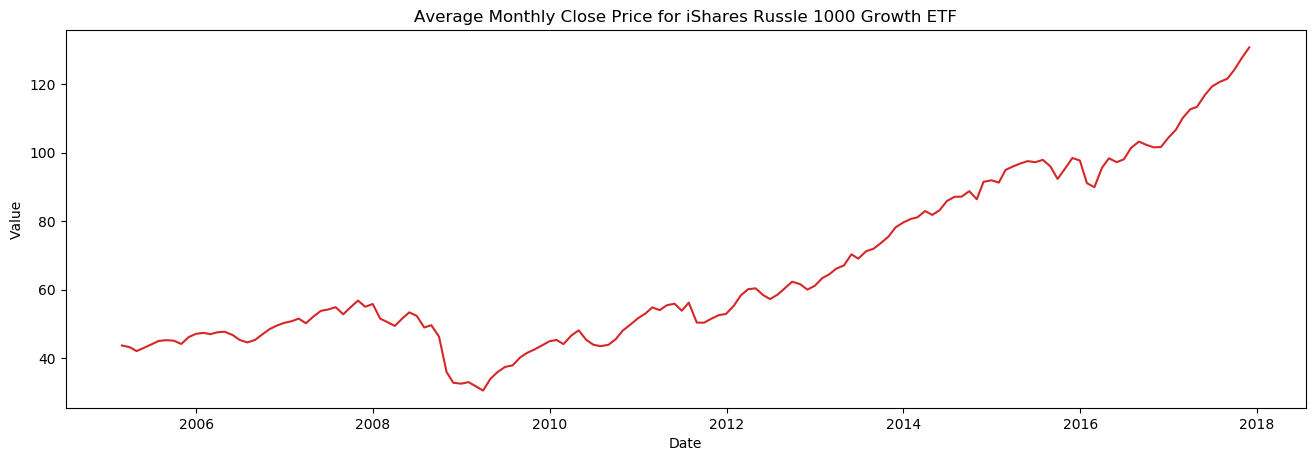

In [13]:
plot_df(month_series, x=month_series.index, y=month_series.values, 
        title='Average Monthly Close Price for iShares Russle 1000 Growth ETF')

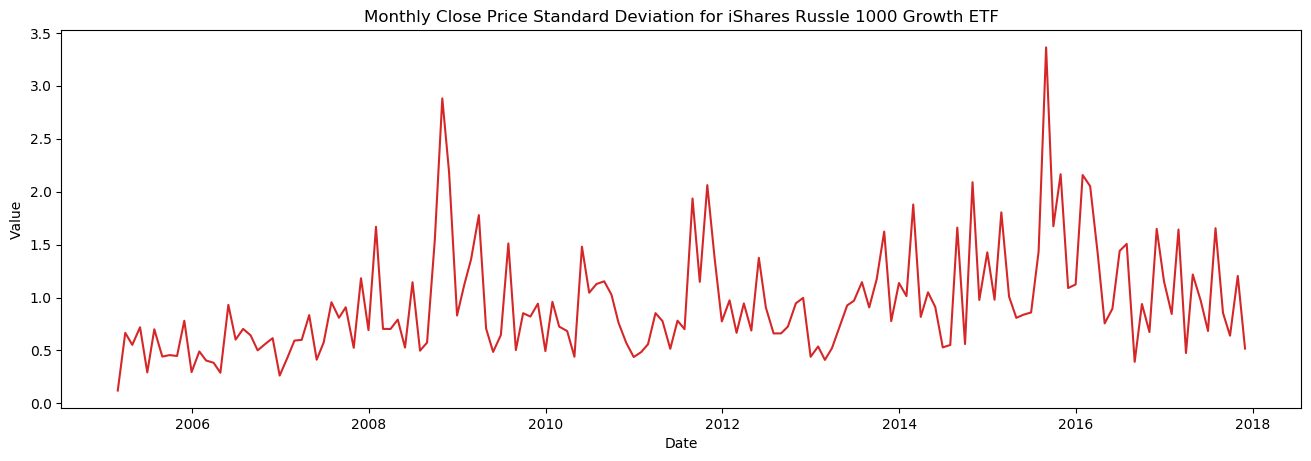

In [14]:
plot_df(month_std_series, x=month_std_series.index, y=month_std_series.values, 
        title='Monthly Close Price Standard Deviation for iShares Russle 1000 Growth ETF')

### Volume
Let's look at volumes now and see how these changed throughout the months

In [15]:
# create new series for volumes 
volume_series = df.resample('BM').mean()['Volume'] 

volume_std_series = df.resample('BM').std()['Volume']

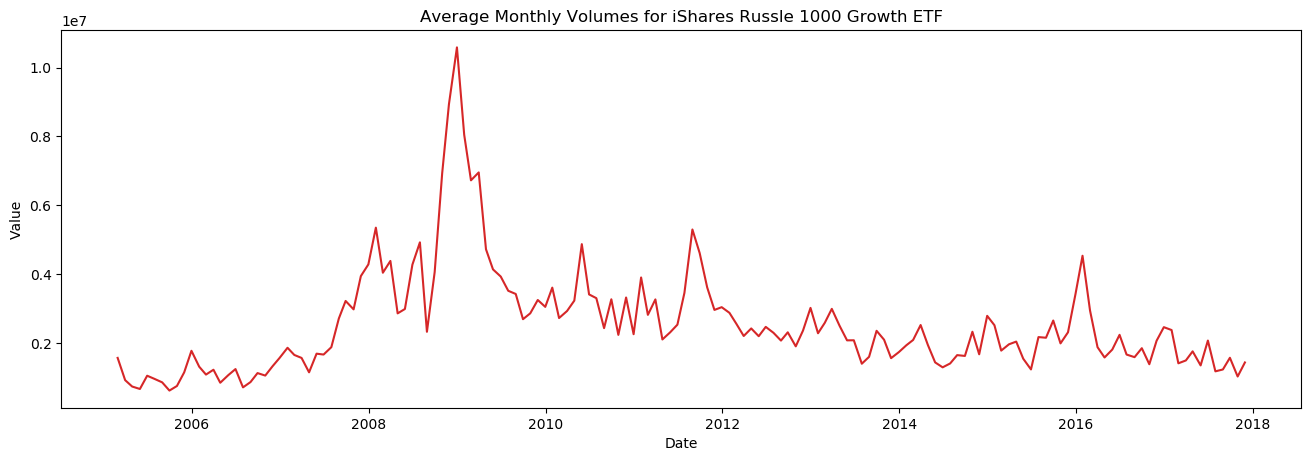

In [16]:
plot_df(volume_series, x=volume_series.index, y=volume_series.values, 
        title='Average Monthly Volumes for iShares Russle 1000 Growth ETF')

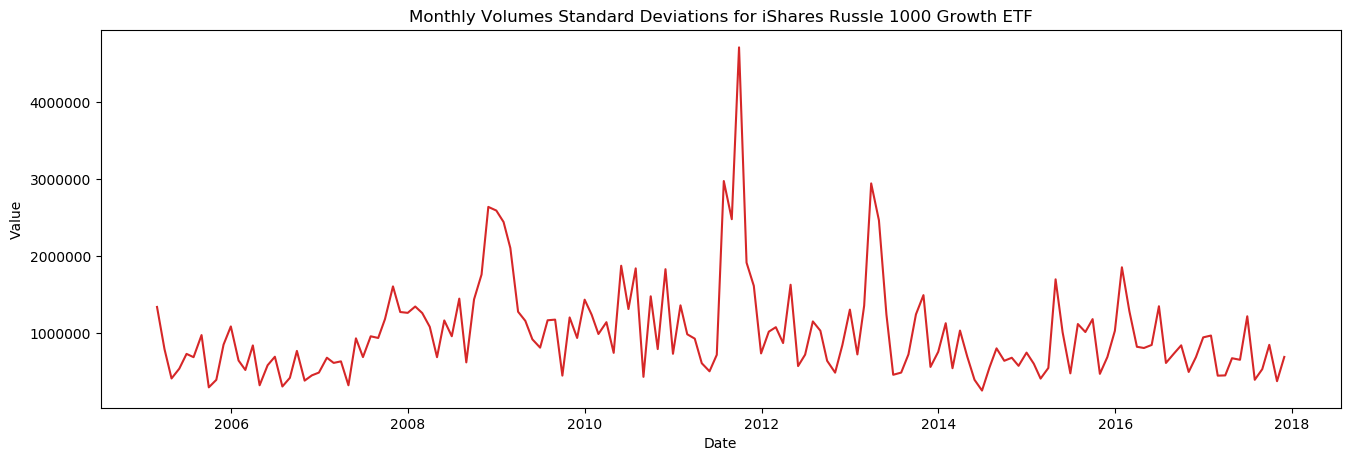

In [17]:
plot_df(volume_series, x=volume_std_series.index, y=volume_std_series.values, 
        title='Monthly Volumes Standard Deviations for iShares Russle 1000 Growth ETF')

## Seasonality
Observe any seasonality throughout the years by plotting each year across the different months. I assume there will be some seasonality in the volumes, with a leveling off in summer months and a pick up during the end / beginning of the year. 

### Closing Price


In [18]:
# prepare data

# Create field for day of the year cold Month_Day
# Should probably change this parameter name to make more sense
from datetime import datetime
df['Day_of_year'] = [i.timetuple().tm_yday for i in df.index]

# retrieve an array of the unique years to plot this out
years = df.Year.unique()

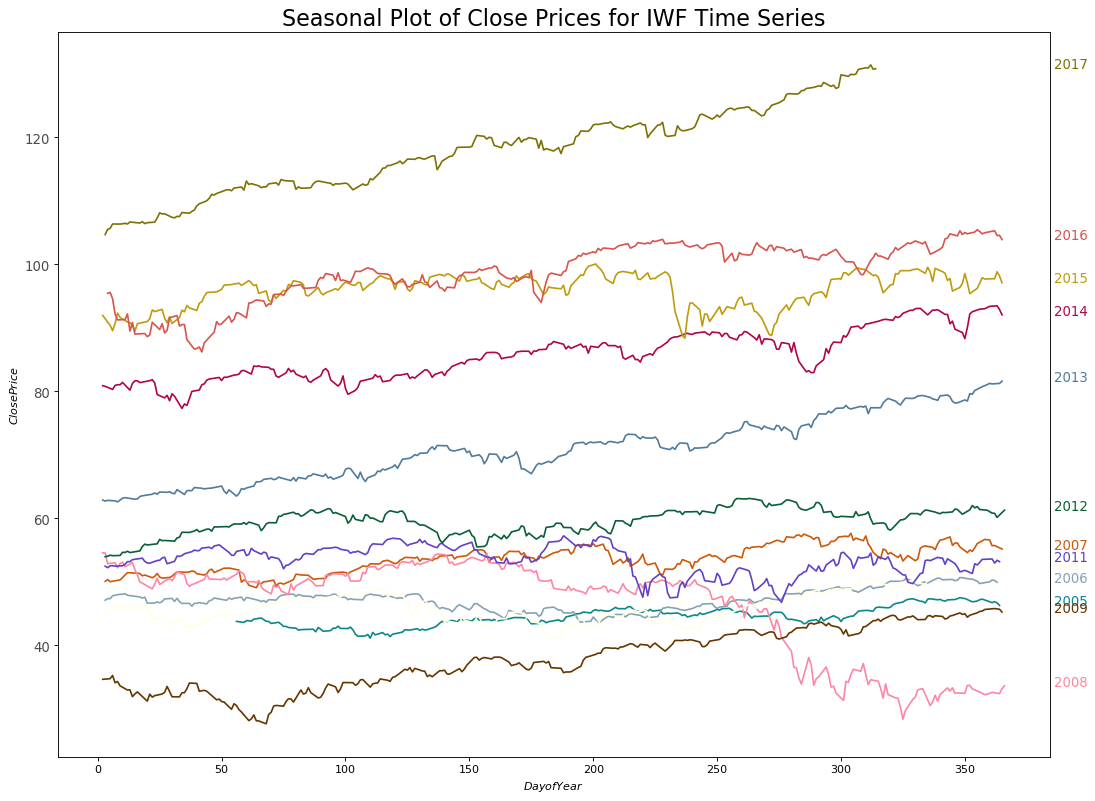

In [19]:
# Prep Colors for plot
np.random.seed(6)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)

# Run through the different years
for i, y in enumerate(years):       
    plt.plot('Day_of_year', 'Close', data=df.loc[df.Year==y, :], color=mycolors[i], label=y)
    plt.text(386, df.loc[df.Year==y, 'Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='$Close Price$', xlabel='$Day of Year$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Close Prices for IWF Time Series", fontsize=20)
plt.show()

### Volumes
Look at seasonality of daily trading volumes

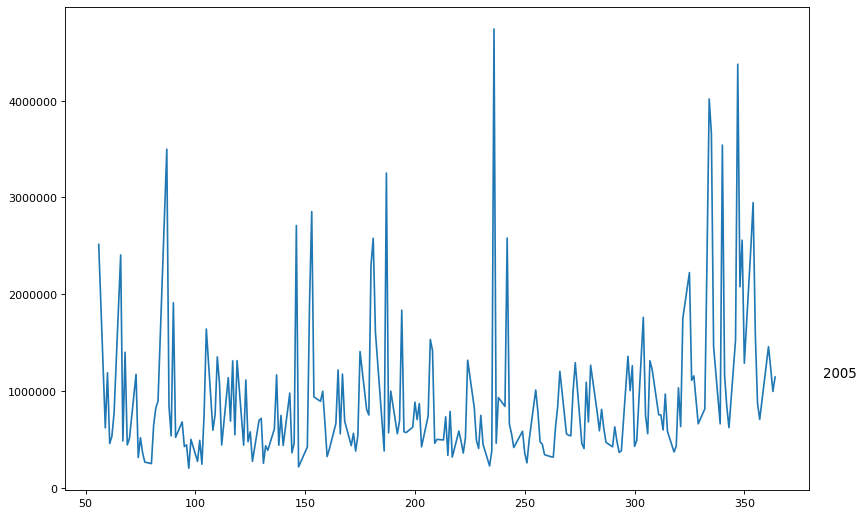

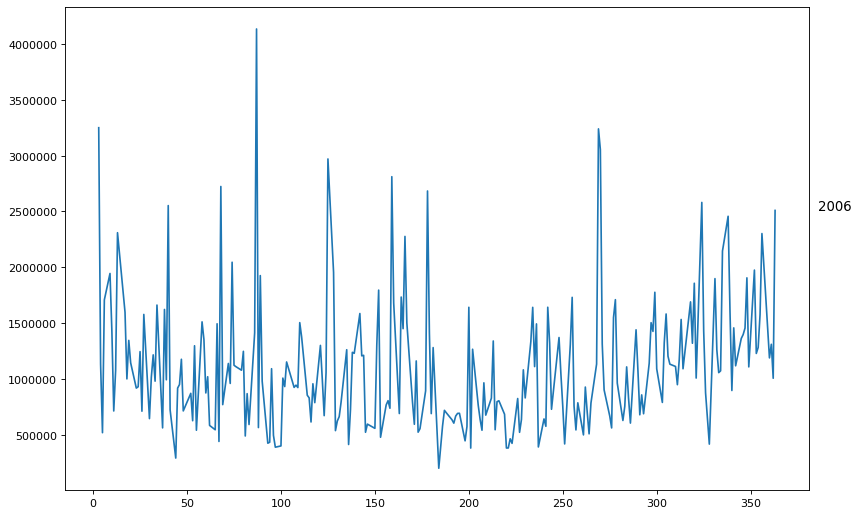

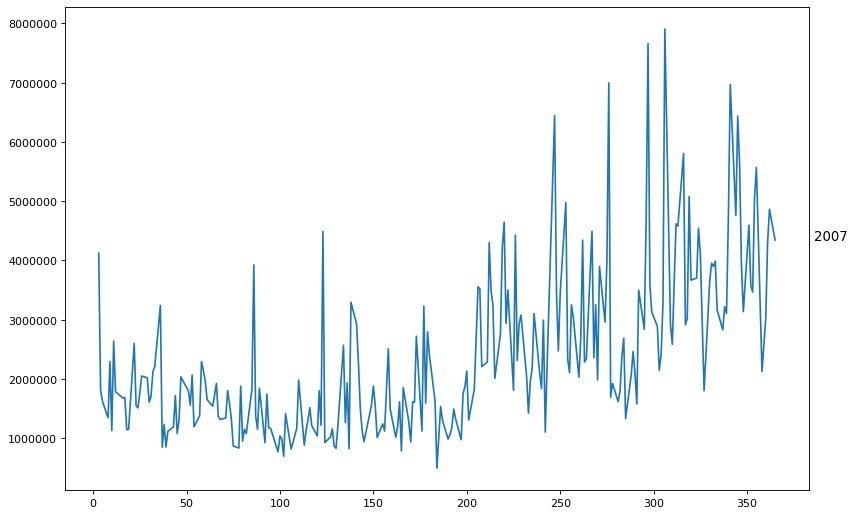

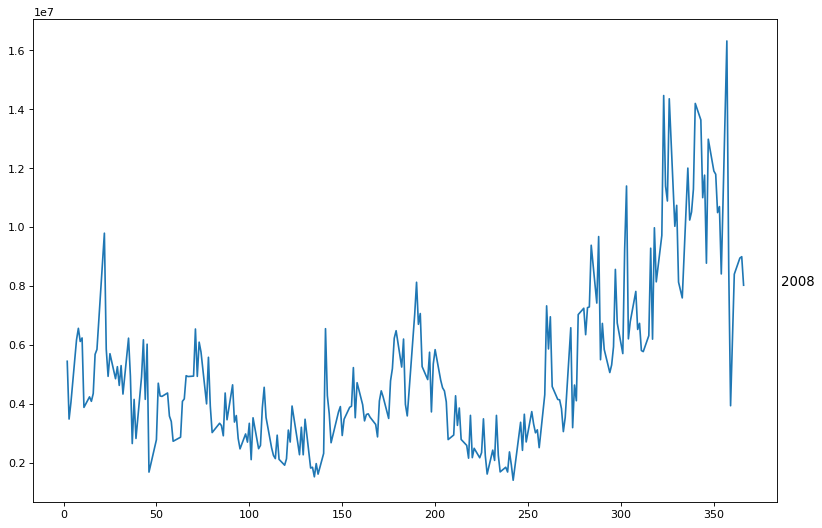

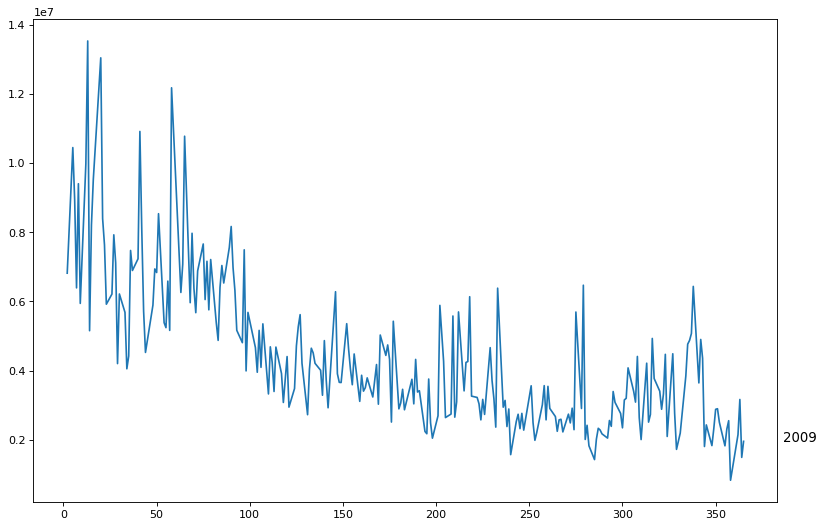

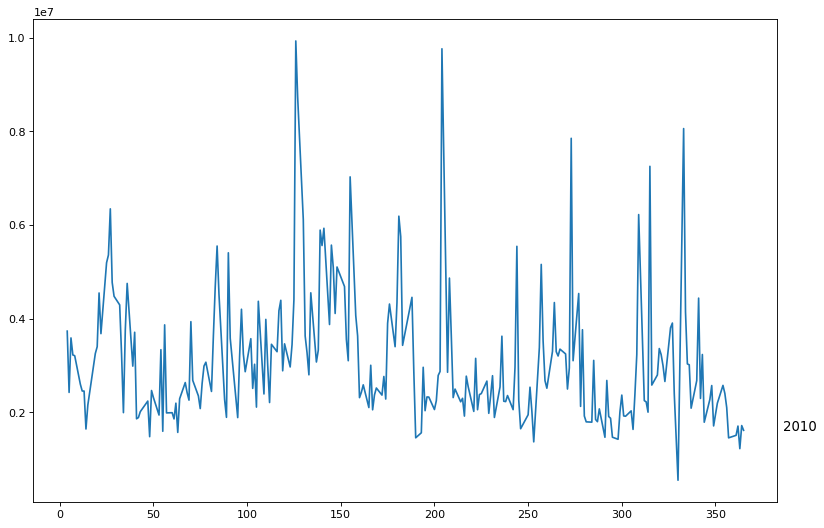

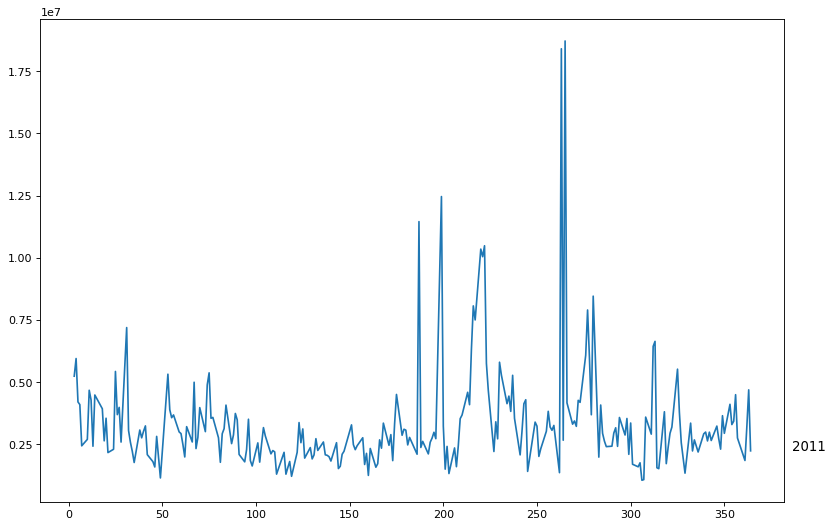

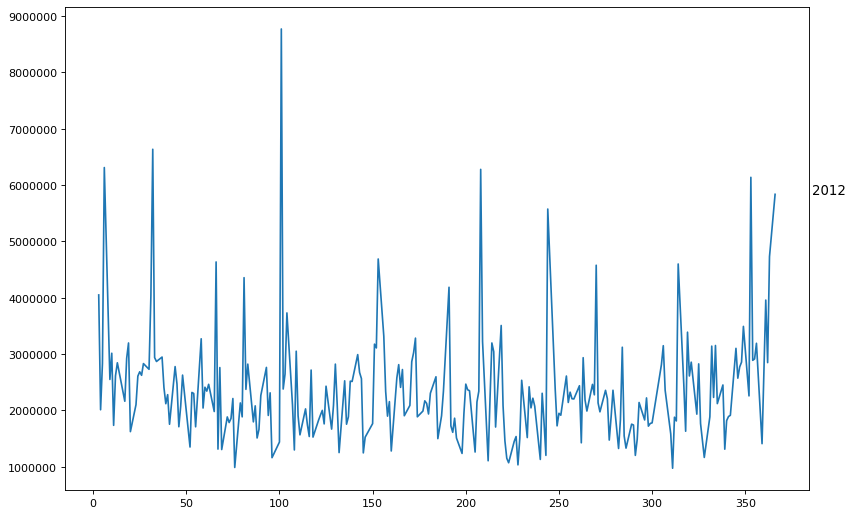

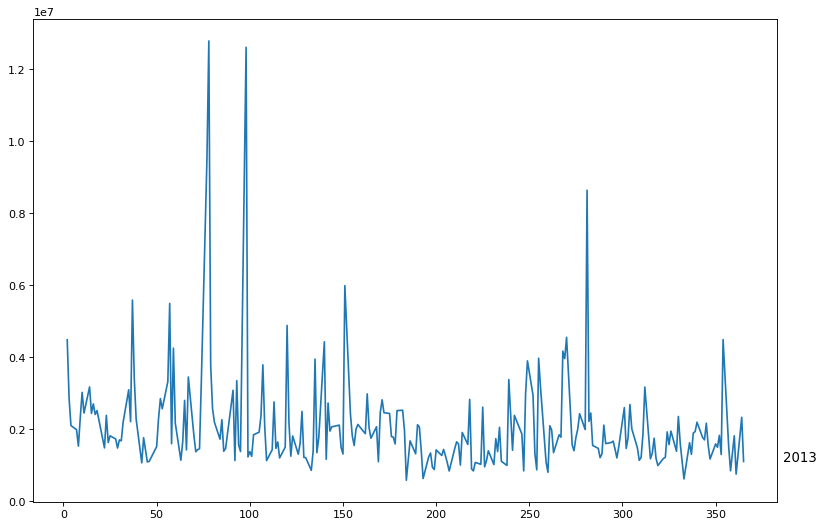

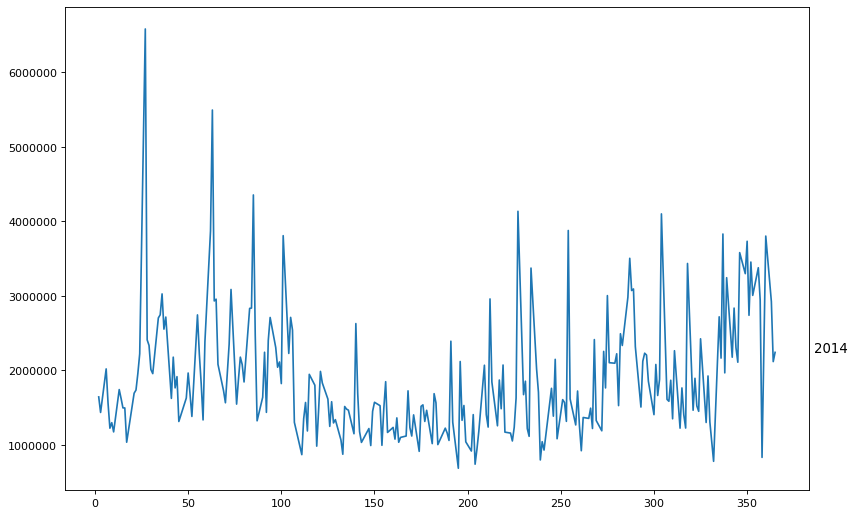

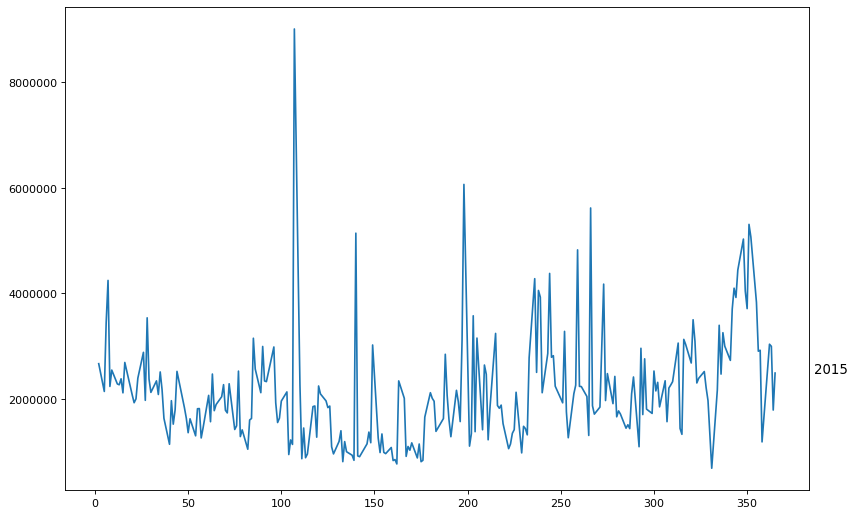

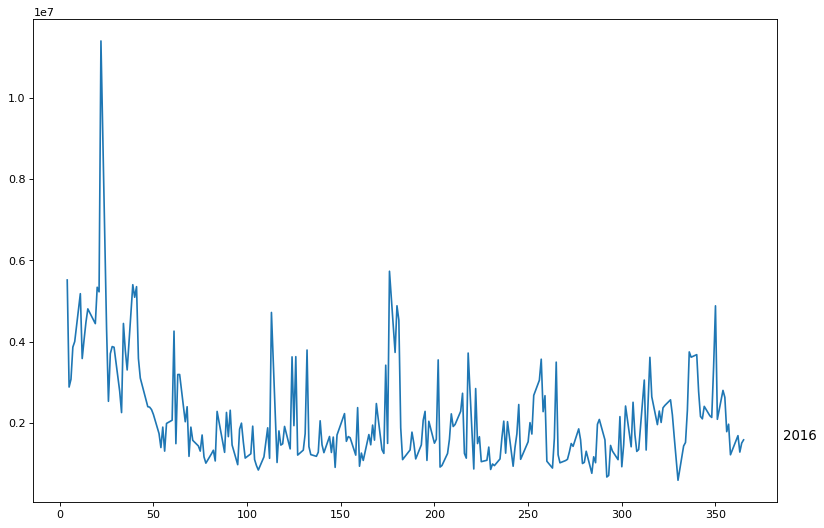

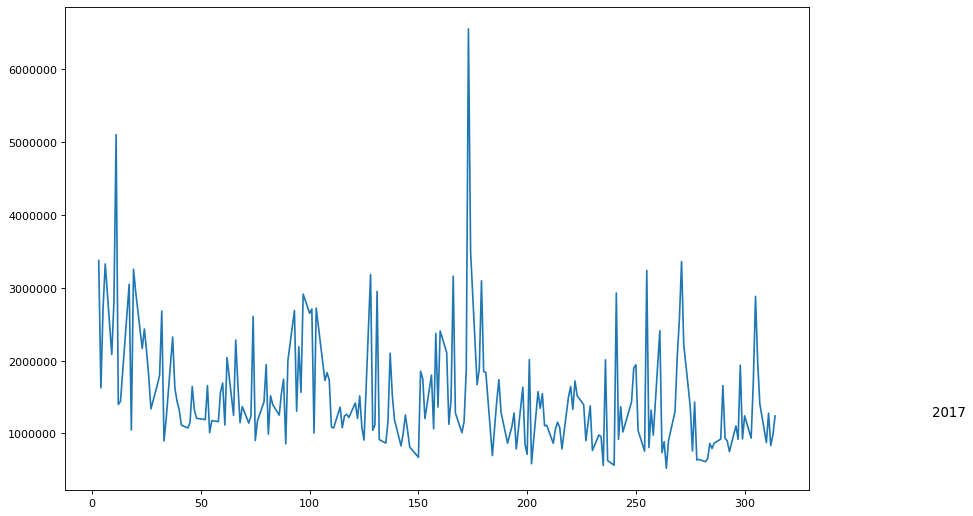

In [20]:
# Prep Colors for plot
np.random.seed(6)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot

# Run through the different years
for i, y in enumerate(years):  
    plt.figure(figsize=(12,8), dpi=80)
    plt.plot('Day_of_year', 'Volume', data=df.loc[df.Year==y, :], label=y)
    plt.text(386, df.loc[df.Year==y, 'Volume'][-1:].values[0], y, fontsize=12)
    plt.show()

# Decoration
# plt.gca().set(ylabel='$Volume$', xlabel='$Day of Year$')
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Seasonal Plot of Daily Trading Volumes for IWF Time Series", fontsize=20)
# plt.show()

### Seasonality with Boxplots
Let's look at seasonality in a different way that may be easier to interpret -- boxplots. 

We will focus solely on Volume as that likely has more seasonal trends than those seen in prices. We could look at price changes to see if that has a season trend but that is a problem to look at in the future. Let's start with solely volumes


In [22]:
df.columns

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017])

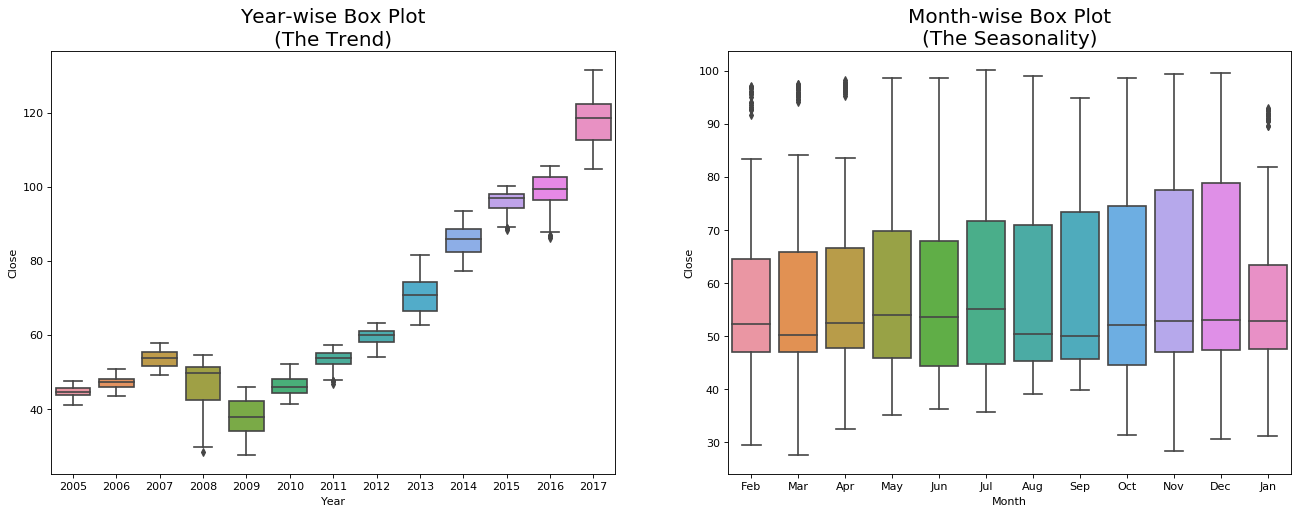

In [30]:
# Draw Plot for Close Price first
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Close', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Close', data=df.loc[~df.Year.isin([2016, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

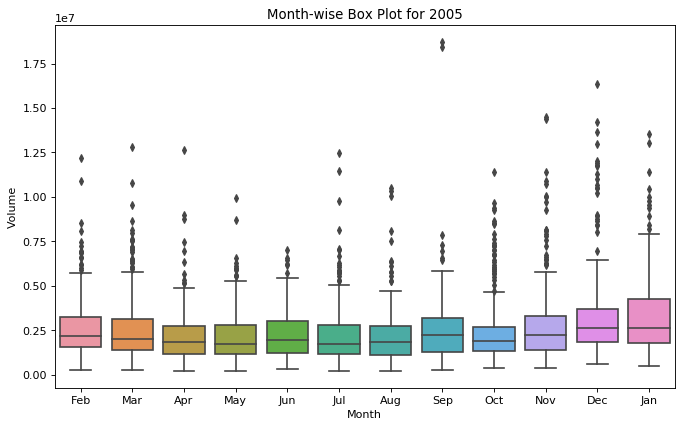

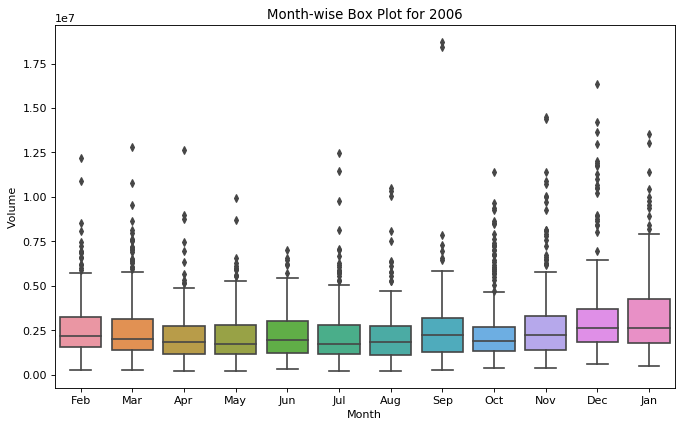

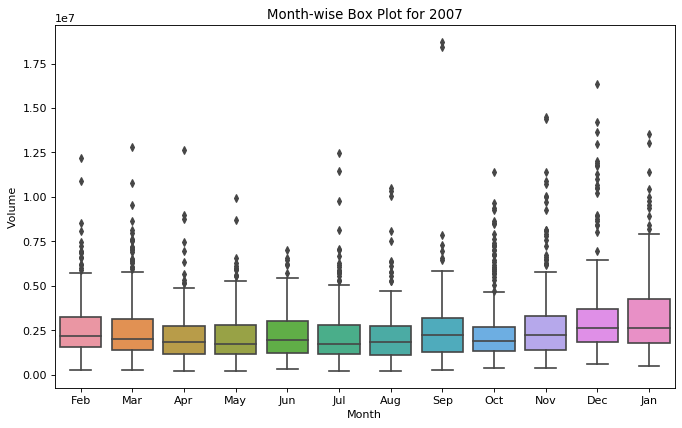

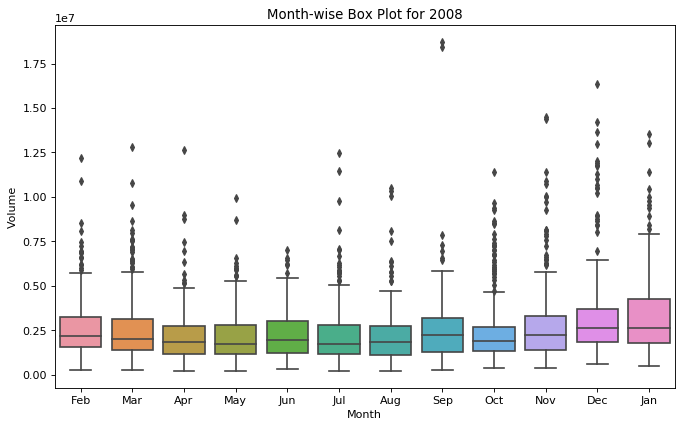

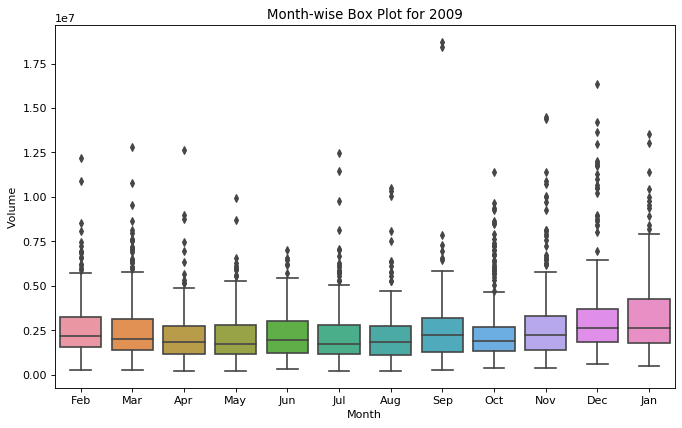

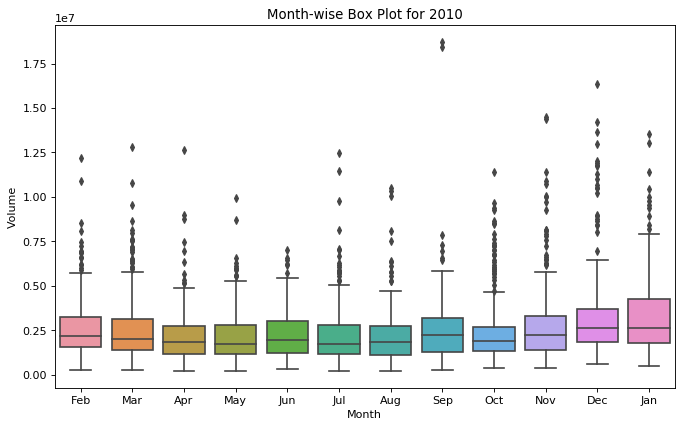

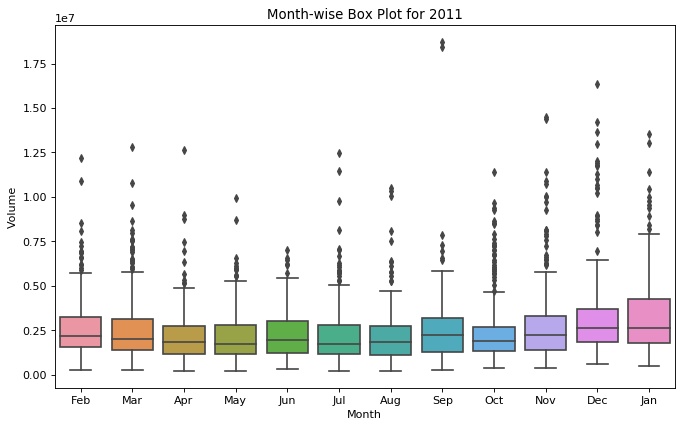

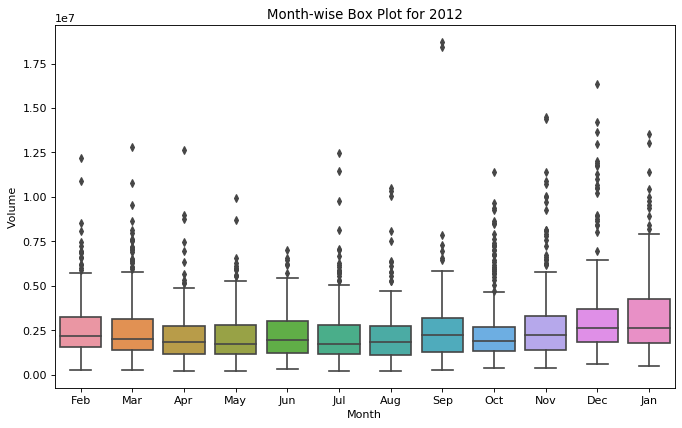

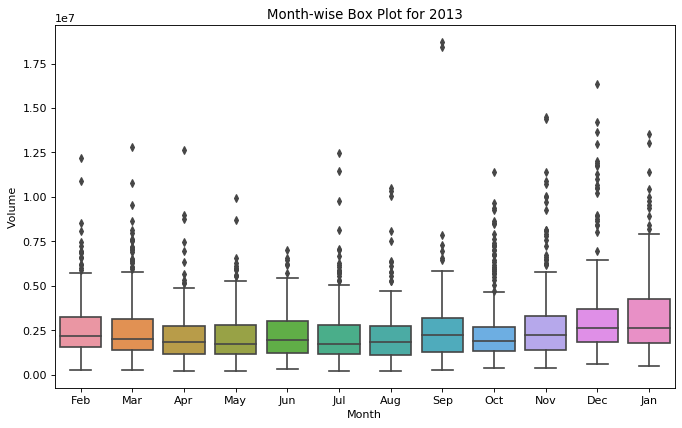

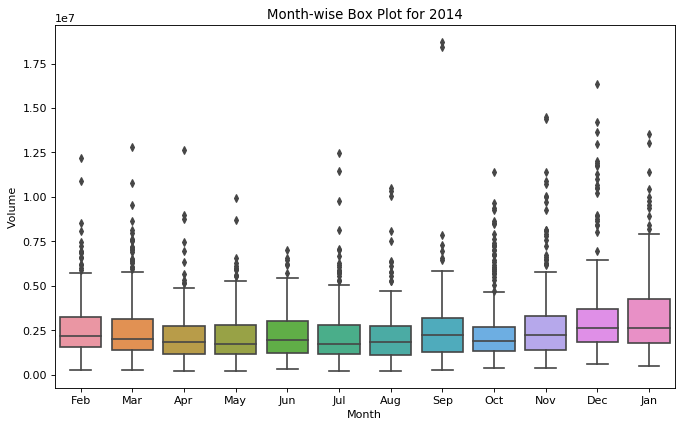

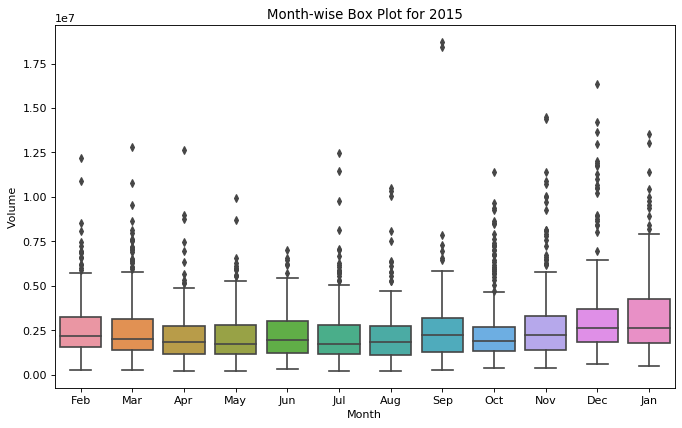

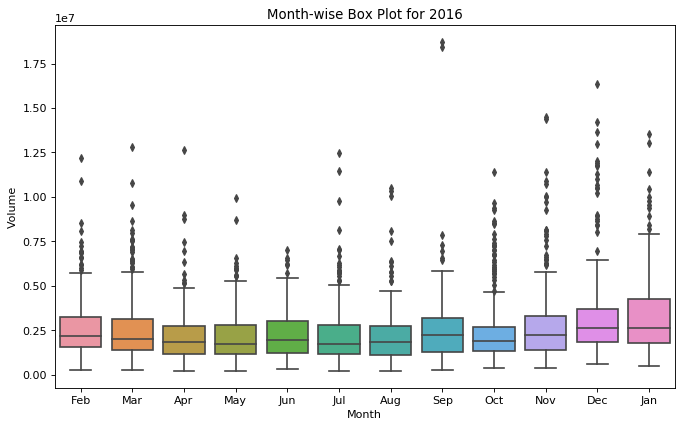

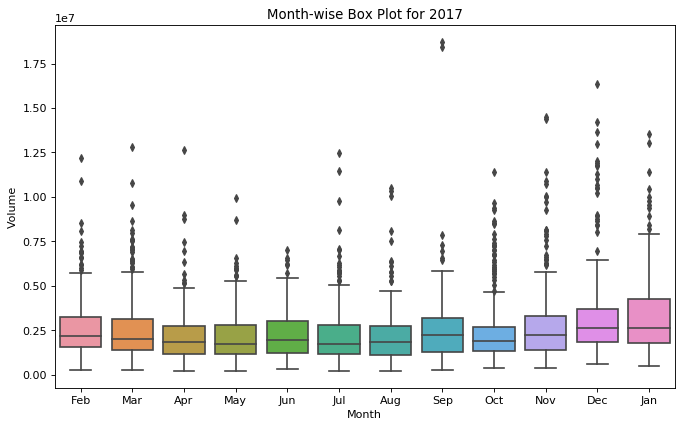

In [37]:
for i, y in enumerate(years):  
    plt.figure(figsize=(10,6), dpi=80)
    sns.boxplot(x='Month', y='Volume', data=df)
    plt.title('Month-wise Box Plot for {0}'.format(y))
    plt.show()
